In [1]:
import scipy
from scipy import *
import matplotlib.pyplot as plt
from matplotlib import *
from __future__ import division
#import scikit.audiolab as audio
import numpy as np
%matplotlib inline

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

---

# Fourier Transform

![Time to Frequency Domain](files/images/time_freq_domain.png)

## The Fourier Transform is like a prism (not the NSA one)

![Prism](files/images/prism.png)

<br />
---
<br />

## Fourier Transform Definition

$$G(f) = \int_{-\infty}^\infty g(t) e^{-i 2 \pi f t} dt$$

<br />
For our purposes, we will just be using the discrete version...
<br /><br />

## Discrete Fourier Transform (DFT) Definition
$$G(\frac{n}{N}) = \sum_{k=0}^{N-1} g(k) e^{-i 2 \pi k \frac{n}{N} }$$

**Meaning**:

* $N$ is the total number of samples
* $g(k)$ is the kth sample for the time-domain function (i.e. the DFT input)
* $G(\frac{n}{N})$ is the output of the DFT for the frequency that is $\frac{n}{N}$ cycles per sample; so to get the frequency, you have to multiply $n/N$ by the sample rate.

# How to represent waves

In [38]:
freq = 1 #hz - cycles per second
amplitude = 3
time_to_plot = 2 # second
sample_rate = 10 # samples per second
num_samples = sample_rate * time_to_plot

t = linspace(0, time_to_plot, num_samples)
signal = [amplitude * sin(freq * i * 2*pi) for i in t] # Explain the 2*pi

### Why the 2*pi?

* If we want a wave which completes 1 cycle per second, so sine must come back to the same position on a circle as the starting point
* So one full rotation about a circle - $2 \pi$ (in radians)

![sine_curve](files/images/Sine_curve_drawing_animation.gif)

# Plot the wave

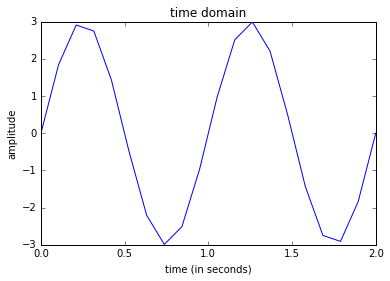

In [39]:
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signal)

# Convert to the Frequency Domain



In [40]:
fft_output = numpy.fft.rfft(signal)
magnitude_only = [sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/num_samples)*sample_rate for i in range(int(num_samples/2+1))]

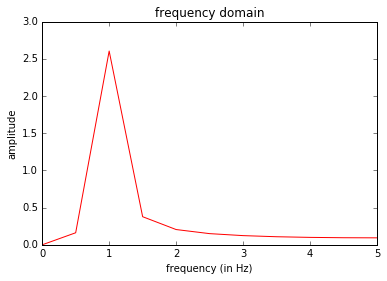

In [41]:
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')
plt.plot(frequencies, magnitude_only, 'r')

## Question: So what does the Fourier Transform give us?

* The amplitudes of simple sine waves
* Their starting position - phase (we won't get into this part much)

## Question: what sine wave frequencies are used?

* Answer: This is determined by how many samples are provided to the Fourier Transform
* Frequencies range from 0 to (number of samples) / 2
* **Example: If your sample rate is 100Hz, and you give the FFT 100 samples, the FFT will return the amplitude of the components with frequencies 0 to 50Hz.**